In [1]:
!pip install numpy pandas tensorflow matplotlib

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


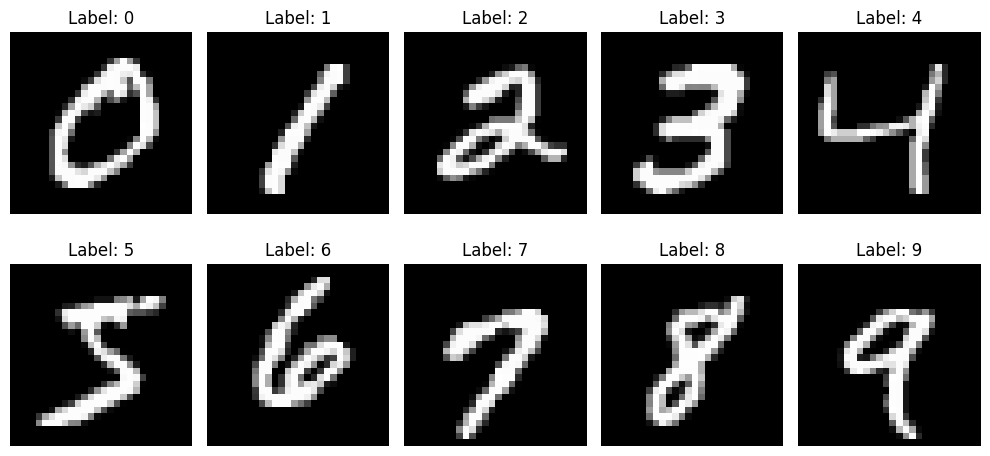

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Find the first occurrence of each digit (0 to 9) in the training set
unique_digits = np.unique(y_train)
digit_images = []

for digit in unique_digits:
    # Find the index of the first occurrence of the digit
    index = np.where(y_train == digit)[0][0]
    digit_images.append((x_train[index], digit))

# Display each digit in a 2x5 grid
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(digit_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap="gray")  # Display as grayscale
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()



In [7]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [8]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8484 - loss: 0.5253 - val_accuracy: 0.9527 - val_loss: 0.1474
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9639 - loss: 0.1145 - val_accuracy: 0.9639 - val_loss: 0.1198
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0789 - val_accuracy: 0.9665 - val_loss: 0.1032
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0552 - val_accuracy: 0.9707 - val_loss: 0.0958
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9869 - loss: 0.0409 - val_accuracy: 0.9732 - val_loss: 0.0907
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9891 - loss: 0.0321 - val_accuracy: 0.9728 - val_loss: 0.1001
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9914 - loss: 0.0249 - val_accuracy: 0.9725 - val_loss: 0.1059
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9927 - loss: 0.0200 - val_accura

In [12]:
import cv2

In [49]:
# Load and preprocess the image for prediction
image = cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = np.invert(image)  # Invert colors if necessary

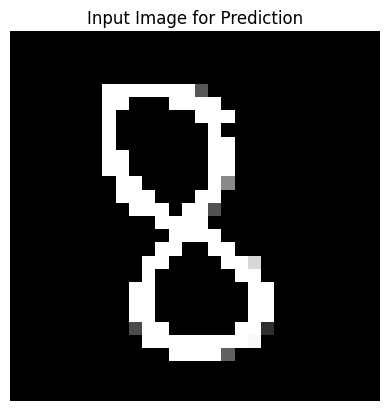

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: 8


In [50]:
image = image.reshape(1, 28, 28).astype("float32") / 255.0

# Display the processed image for confirmation
plt.imshow(image[0], cmap="gray")
plt.title("Input Image for Prediction")
plt.axis("off")
plt.show()

# Predict and display result
output = model.predict(image)
print("Predicted class:", np.argmax(output))